# A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.
● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("sales_add.csv")

In [4]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [5]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [6]:
#1 increase in sale

data1=data.groupby("Region", as_index = False).sum()

In [7]:
data1.head

<bound method NDFrame.head of        Region  Sales_before_digital_add(in $)  Sales_After_digital_add(in $)
0  Region - A                         1482049                        2388531
1  Region - B                         1053665                        1601095
2  Region - C                          747565                        1095096>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

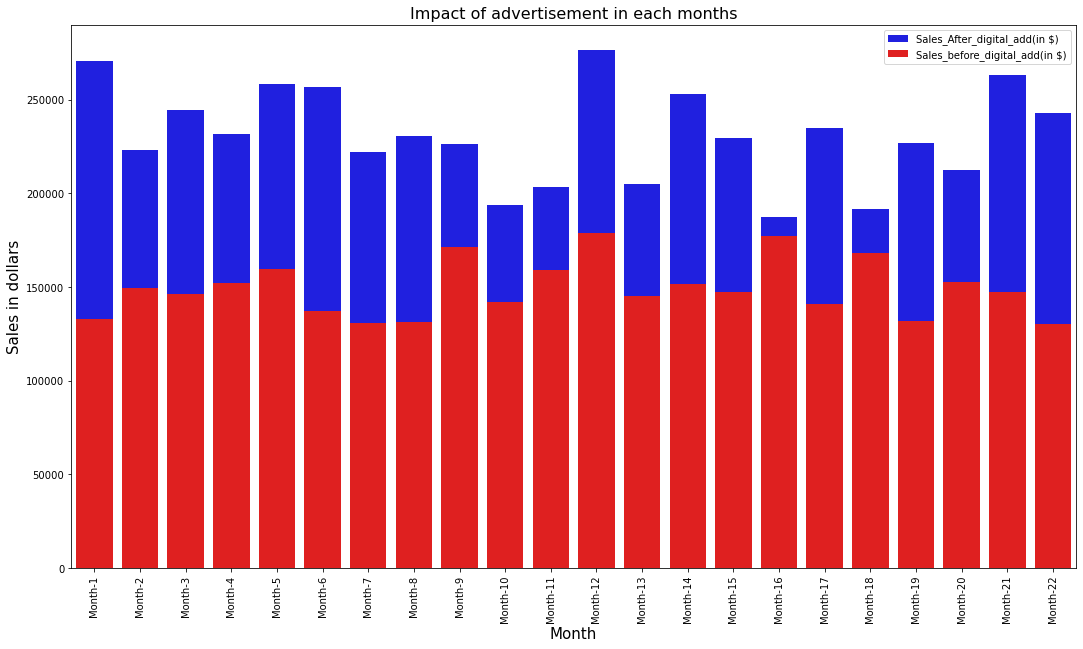

In [21]:
## Impact of sales in months before and after advertisement.
ax = plt.subplots(figsize=(18,10))
# Plotting columns
ax = sns.barplot(x ='Month',y ='Sales_After_digital_add(in $)',label='Sales_After_digital_add(in $)',data = data,color = 'Blue')
ax = sns.barplot(x ='Month',y ='Sales_before_digital_add(in $)',label='Sales_before_digital_add(in $)',data = data,color='Red')
plt.title("Impact of advertisement in each months",fontsize=16)  
# Renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
ax.legend()
plt.xlabel("Month",fontsize=15)
plt.ylabel("Sales in dollars",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [24]:
## loading chi2_contingency
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(pd.crosstab(data1.Region, data.Manager))
## the test statistic.
c

3.0

In [25]:
dof

2

In [26]:
expected

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

In [27]:
p

0.22313016014842982

# p value greater than 0.05